### 1. Face Emotion Classification with a three layer neural network

In this problem we return to the face emotion data studied previously. You may it find very helpful to use code from a past activity.

(a) Build a classifier using a full connected three layer neural network with logistic activation functions. Your network should

- take a vector $x \in R^{10}$ as input (nine features plus a constant offset),
- have a single, fully connected hidden layer with 32 neurons
- output a scalar $\hat{y}$

Note that since the logistic activation function is always positive, your decision should be as follows: $\hat{y} > 0.5$ corresponds to a 'happy'face, while $\hat{y} \leq 0.5$  is not happy.

(b) Train your classifier using stochastic gradient descent (start with a step size of 
$α$ = 0.05) and create a plot with the number of epochs on the horizontal axis, and training accuracy on the vertical axis.  Does your classifier achieve 0% training error?  If so,  how many epoch does it take for your classifier to achieve perfect classification on the training set? 

In [1]:
def logsig(_x):
    return 1/(1+np.exp(-_x))

In [2]:
def run_epoch(L, M, q, p):
    ind_yhat_dict = dict()
    ## initial weights
    V = np.random.randn(M+1, q); 
    #print("V shape:", V.shape)
    W = np.random.randn(p+1, M);
    #print("W.shape:",W.shape)
    for epoch in range(L):
        ind = np.random.permutation(n)
        for i in ind:
            # Forward-propagate
            H = logsig(np.hstack((np.ones((1,1)), Xb[[i],:]@W)))
            Yhat = logsig(H@V)
             # Backpropagate
            delta = (Yhat-Y[[i],:])*Yhat*(1-Yhat)
            Vnew = V-alpha*H.T@delta
            gamma = delta@V[1:,:].T*H[:,1:]*(1-H[:,1:])
            Wnew = W - alpha*Xb[[i],:].T@gamma
            V = Vnew
            W = Wnew
            ind_yhat_dict[i] = int(Yhat > 0.5)

    ind_yhat_dict = dict(sorted(ind_yhat_dict.items()))
    err_c1 =  np.sum(np.array(list(ind_yhat_dict.values())) == Y[:,0])
    error_rate = 1 - (err_c1 / np.shape(Y)[0])
    return error_rate

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
dataset = loadmat('face_emotion_data.mat')

X, Y = dataset['X'], dataset['y']
n, p = np.shape(X)

Y[Y==-1] = 0  # use 0/1 for labels instead of -1/+1\
X = np.hstack((np.ones((n,1)), X))  # append a column of ones

## Train NN
Xb = X 
q = np.shape(Y)[1] #number of classification problems
M = 32 #number of hidden nodes

alpha = 0.05 #step size
L = np.arange(0,50,10) #number of epochs = you cycle through all the training data one time, in random order
error_rates = []

for epoch in L:
    rate = run_epoch(epoch, M, q, p)
    error_rates.append(rate)

error_rates

<ipython-input-2-8cfa8c4a5d08>:24: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  err_c1 =  np.sum(np.array(list(ind_yhat_dict.values())) == Y[:,0])


[1.0, 0.0234375, 0.0078125, 0.0078125, 0.0078125]

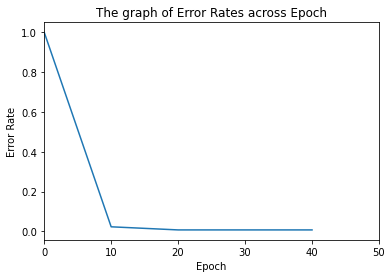

In [4]:
import matplotlib.pyplot as plt 

plt.plot(L, error_rates)
plt.title('The graph of Error Rates across Epoch')
plt.xlabel('Epoch')
plt.ylabel('Error Rate')
plt.xlim(0,50)
plt.show()

(c) Find a more realistic estimate of the accuracy of your classifier by using 8-fold cross validation.  Can you achieve perfect test accuracy?

In [5]:
X_subsets = [X[:16,:], X[16:32,:], X[32:48,:], X[48:64,:], X[64:80,:], X[80:96,:], X[96:112,:], X[112:,:]]
y_subsets = [Y[:16,:], Y[16:32,:], Y[32:48,:], Y[48:64,:], Y[64:80,:], Y[80:96,:], Y[96:112,:], Y[112:,:]]

In [33]:
alpha = 0.05 #step size
L = 100 #number of epochs = you cycle through all the training data one time, in random order

error_rates = []

for fold in range(8):
    X = X_subsets.copy()
    y = y_subsets.copy()
    X_test = X.pop(fold)
    y_test = y.pop(fold) # use the remaining hold-out set to evaluate the classifier performance
    n, p = np.shape(X[0])
    p -= 1
    q = np.shape(Y)[1] #number of classification problems
    
    M = 32 #number of hidden nodes
    V = np.random.randn(M+1, q);
    W = np.random.randn(p+1, M); 
    
    #print("V shape:",V.shape)
    #print("W shape:",W.shape)
    
    ### TRAINING
    for j in range(7):
        for epoch in range(L):
            ind = np.random.permutation(n)
            Xb = X[j]
            Y = y[j]
            for i in ind:
                # Forward-propagate
                H = logsig(np.hstack((np.ones((1,1)), Xb[[i],:]@W)))
                Yhat = logsig(H@V)
                 # Backpropagate
                delta = (Yhat-Y[[i],:])*Yhat*(1-Yhat)
                Vnew = V-alpha*H.T@delta
                gamma = delta@V[1:,:].T*H[:,1:]*(1-H[:,1:])
                Wnew = W - alpha*Xb[[i],:].T@gamma
                V = Vnew
                W = Wnew
    
        ### TESTING
    H = logsig(np.hstack((np.ones((X_test.shape[0],1)), X_test @ W)))
    Yhat = logsig(H@V)
    Yhat[Yhat > 0.5] = 1
    Yhat[Yhat <= 0.5] = 0
    err_c1 =  np.sum(abs(np.round(Yhat[:,0]) - y_test[:,0]))
    error_rate = (err_c1 / 16)
    error_rates.append(error_rate)

print("Total average test set error rate:", np.mean(error_rates))

Total average test set error rate: 0.0546875


### 2. Face Emotion Classification with Kernel Classifier

In this problem you will apply a kernel classifier to the face emotion dataset. You may find it very helpful to use code from an activity.

(a) Build a kernel classifier using

- the squared error loss function
- an $l_2$ regularizer with $\lambda = 0.5$.
- the Gaussian Kernel $K(u,v) = exp(-||u-v||^2 / (2\sigma^2)$.\

(b) Train your classifier choosing for different values of $\sigma$ and create a plot with $\sigma$ on the hortizontal axis and accuracy on the vertical axis and comment on the plot. Does your classifier achieve 0% training error?

In [37]:
dataset = loadmat('face_emotion_data.mat')

X, y = dataset['X'], dataset['y']
n, p = np.shape(X)

y[y==-1] = 0  # use 0/1 for labels instead of -1/+1\
X = np.hstack((np.ones((n,1)), X))  # append a column of ones

sigma = 5
lam = 0.5

distsq=np.zeros((n,n),dtype=float)

for i in range(0,n):
    for j in range(0,n):
        d = np.linalg.norm(X[i,:]-X[j,:])
        distsq[i,j]=d**2
        
K = np.exp(-distsq/(2*sigma**2))

alpha = np.linalg.inv(K+lam*np.identity(n))@y

y_hat = K @ alpha

y_hat[y_hat > 0.5] = 1
y_hat[y_hat <= 0.5] = 0

In [38]:
sigmas = np.arange(0,20,1)
#print(sigmas)
accuracies = []
for sigma in sigmas:
    K = np.exp(-distsq/(2*sigma**2))
    alpha = np.linalg.inv(K + lam * np.eye(n)) @ y
    y_hat = K @ alpha
    y_hat[y_hat > 0.5] = 1
    y_hat[y_hat <= 0.5] = 0
    err_c1 =  np.sum(abs(np.round(y_hat[:,0] - y[:,0])))
    error_rate = (err_c1 / n)
    error_rates.append(error_rate)
    accuracies.append(1 - error_rate)

<ipython-input-38-25152c979b96>:5: RuntimeWarning: divide by zero encountered in true_divide
  K = np.exp(-distsq/(2*sigma**2))
<ipython-input-38-25152c979b96>:5: RuntimeWarning: invalid value encountered in true_divide
  K = np.exp(-distsq/(2*sigma**2))


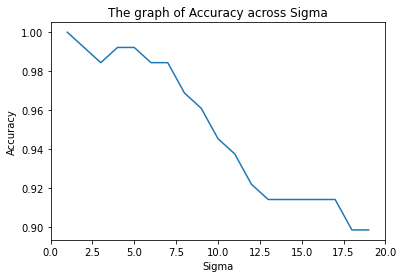

In [39]:
plt.plot(sigmas, accuracies)
plt.title('The graph of Accuracy across Sigma')
plt.xlabel('Sigma')
plt.ylabel('Accuracy')
plt.xlim(0,20)
plt.show()

(c) Find a more realistic estimate of the accuracy of your classifier by using 8-fold cross validation. Can you achieve perfect test accuracy?

In [55]:
alpha = 0.05 #step size
simgas = np.arange(1,20,1)
lam = 0.5

error_rates = []
accuracies = []

for fold in range(8):
    X = X_subsets.copy()
    y = y_subsets.copy()
    X_test = X.pop(fold)
    y_test = y.pop(fold) # use the remaining hold-out set to evaluate the classifier performance
    n = 16
    distsq=np.zeros((n,n),dtype=float)
    for i in range(0,n):
        for j in range(0,n):
            d = np.linalg.norm(X_p[i,:]- X_p[j,:])
            distsq[i,j]=d**2
            
    for sigma in sigmas:
        #print("Sigma:", sigma)
        K = np.exp(-distsq/(2*sigma**2))
        alpha = np.linalg.inv(K+lam*np.identity(16)) @ y_test
        y_hat = K @ alpha
        y_hat[y_hat > 0.5] = 1
        y_hat[y_hat <= 0.5] = 0      
        #print(y_hat)
        err_c1 =  np.sum(abs(np.round(y_hat - y_test)))
        #print(err_c1)
        error_rate = (err_c1 / n)
        error_rates.append(1 - error_rate)
        #print(error_rate)
        
avg_error_rates = np.mean(error_rates)

print("Average Test Accuracy across sigma:", avg_error_rates)

Average Test Accuracy across sigma: 0.7750822368421053
